In [3]:
# Customized from https://www.tensorflow.org/tutorials/audio/simple_audio#next_steps
import tensorflow as tf
import os
import pathlib
print("tensorflow version", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
#import torch
#import torchaudio


from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

#Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

tensorflow version 2.16.1


In [4]:
# Dataset_path finds data in folder
DATASET_PATH = 'train'

# Downloads data from Google folder 
data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data'
  )

# Folder has been created, delete the .asd files
import os
from pydub import AudioSegment
for folder in os.listdir(data_dir):
  if folder == 'README.md':
    continue
  for file in os.listdir(os.path.join(data_dir,folder)):
    file_path = os.path.join(data_dir,folder,file)
    # If it's a text file, delete it
    if file.endswith('.wav.asd'):
      os.remove(file_path)
    if folder == 'close':
      if file.endswith('.wav'):
        stereo_audio = AudioSegment.from_file(file_path, format="wav")
        mono_audios = stereo_audio.split_to_mono() 
        if len(mono_audios) > 1:
          print(os.path.join(file_path))
          # mono = mono_audios[0].export(os.path.join(data_dir,folder, file), format="wav")
          



  
      

C:\Users\kpseg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [5]:
if folder == "close":
      noise = np.random.randn(len(data))
      augmented_data = data + noise_factor * noise
        # Cast back to same data type
      augmented_data = augmented_data.astype(type(data[0]))
      #return augmented_data

In [6]:
# Finds command folder labels
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]
print('Commands:', commands)

Commands: ['Notopen' 'open']


In [7]:
# Prints data about files, splits some for training and some for testing accuracy
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    #label_mode="binary",
    subset='both')

print("train_ds length: ", len(train_ds));
label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)
for spec in train_ds:
    print(spec[1])

Found 892 files belonging to 2 classes.
Using 714 files for training.
Using 178 files for validation.
train_ds length:  12

label names: ['Notopen' 'open']
tf.Tensor(
[1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1], shape=(64,), dtype=int32)
tf.Tensor(
[1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1], shape=(64,), dtype=int32)
tf.Tensor(
[0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0], shape=(64,), dtype=int32)
tf.Tensor(
[0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1], shape=(64,), dtype=int32)
tf.Tensor(
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1], shape=(64,), dtype=int32)

In [8]:
# Prints data about training
train_ds.element_spec

(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [9]:
# Here is where we would add data pre-processing in training code
# Squeeze edits code samples
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

In [10]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [11]:
# Sets an audio sample, prints shape of sample and its label
for example_audio, example_labels in train_ds.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


In [12]:
#label_names[[1,1,3,0]]

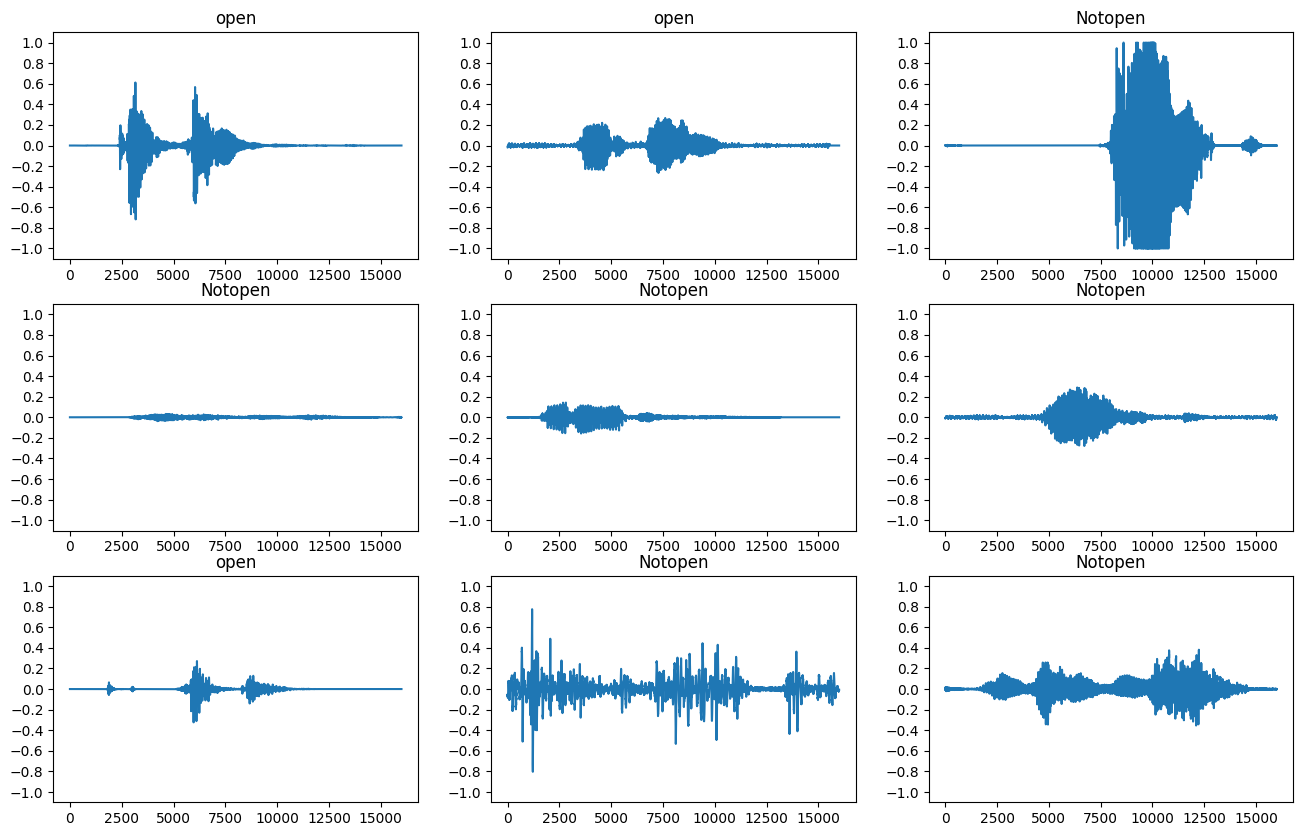

In [13]:
# Prints waveforms for audio examples
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = example_audio[i]
  plt.plot(audio_signal)
  plt.title(label_names[example_labels[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

In [14]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [15]:
#Prints information about example with audioclip
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: open
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: open
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: Notopen
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [16]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

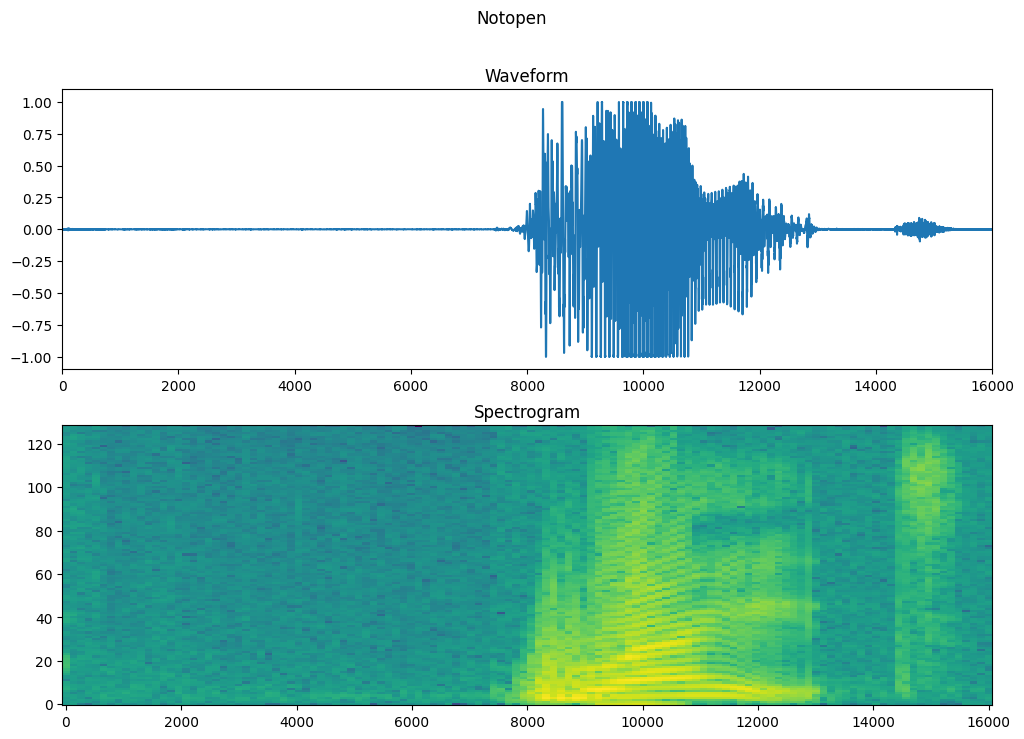

In [17]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [18]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [19]:
train_spectrogram_ds = make_spec_ds(train_ds)
print(len(train_spectrogram_ds));
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

12


In [20]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

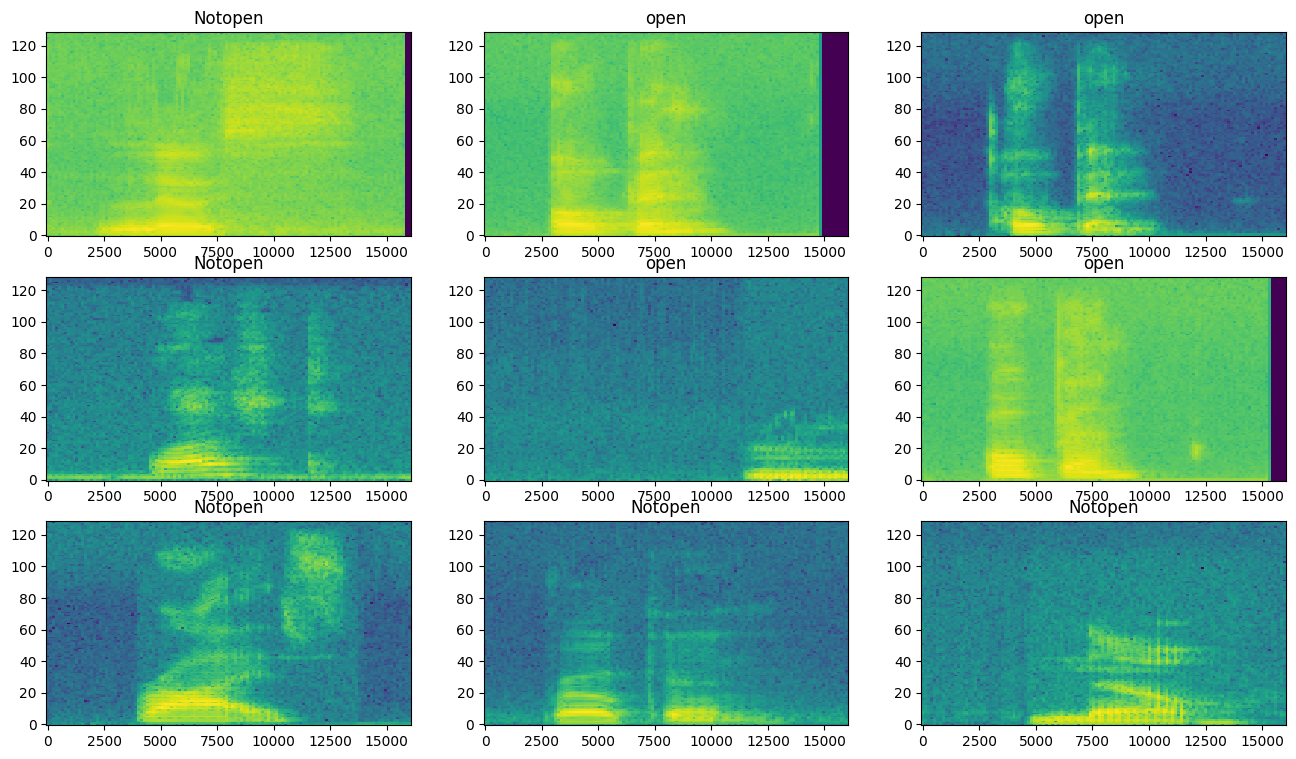

In [21]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

In [22]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
print(len(train_spectrogram_ds));
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
print(len(val_spectrogram_ds));
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
print(len(test_spectrogram_ds));

12
1
2


In [23]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)
# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(128, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)               │ (None, 128, 32, 1)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ normalization (Normalization)     │ (None, 128, 32, 1)       │             3 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                   │ (None, 126, 30, 32)      │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 63, 15, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 61, 13, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 30, 6, 64)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout (Dropout)                 │ (None, 30, 6, 64)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 11520)            │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │     1,474,688 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_1 (Dropout)               │ (None, 128)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 2)                │           258 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 1,493,765 (5.70 MB)

 Trainable params: 1,493,762 (5.70 MB)

 Non-trainable params: 3 (16.00 B)

In [24]:
print(num_labels)
print(train_spectrogram_ds.element_spec)
print(len(train_spectrogram_ds))
for spec in train_spectrogram_ds:
    print(spec[1])

2
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
12
tf.Tensor(
[0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0], shape=(64,), dtype=int32)
tf.Tensor(
[1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1], shape=(64,), dtype=int32)
tf.Tensor(
[0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0], shape=(64,), dtype=int32)
tf.Tensor([0 0 0 1 0 0 0 0 1 0], shape=(10,), dtype=int32)
tf.Tensor(
[0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0], shape=(64,), dtype=int32)
tf.Tensor(
[0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 

In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [26]:
EPOCHS = 12
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=4),
)

#for i in range(n):
    #print(model(example_spectrograms[i].numpy()));
    #print(label_names[example_spect_labels[i].numpy()]);

Epoch 1/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5567 - loss: 0.6992 - val_accuracy: 0.8281 - val_loss: 0.4365
Epoch 2/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7700 - loss: 0.4972 - val_accuracy: 0.8750 - val_loss: 0.3104
Epoch 3/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8823 - loss: 0.3124 - val_accuracy: 0.8125 - val_loss: 0.3609
Epoch 4/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8701 - loss: 0.2771 - val_accuracy: 0.8125 - val_loss: 0.3774
Epoch 5/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8837 - loss: 0.2656 - val_accuracy: 0.9219 - val_loss: 0.2663
Epoch 6/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9608 - loss: 0.1438 - val_accuracy: 0.9375 - val_loss: 0.2078
Epoch 7/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9601 - loss: 0.1034 - val_accuracy: 0.9375 - val_loss: 0.2448
Epoch 8/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9843 - loss: 0.0642 - val_accuracy: 0.9219 - v

In [27]:
model.save("updated_open4.keras")



In [28]:
#test data
DATASET_PATH = 'test'

# load directory 
data_dir = pathlib.Path(DATASET_PATH)
test_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    #label_mode="binary",
    subset='both')

test_ds = test_ds.map(squeeze, tf.data.AUTOTUNE)
test_spectrogram_ds = make_spec_ds(test_ds)

NotFoundError: Could not find directory test